In [2]:
import pandas as pd
import pickle

In [3]:
df = pd.read_csv('ipl.csv')

In [4]:
df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [5]:
df['venue'].value_counts()

M Chinnaswamy Stadium                                   7443
Feroz Shah Kotla                                        7068
Eden Gardens                                            7049
Wankhede Stadium                                        7048
MA Chidambaram Stadium, Chepauk                         5972
Rajiv Gandhi International Stadium, Uppal               5827
Punjab Cricket Association Stadium, Mohali              4247
Sawai Mansingh Stadium                                  4110
Dr DY Patil Sports Academy                              2088
Subrata Roy Sahara Stadium                              2086
Maharashtra Cricket Association Stadium                 1843
Kingsmead                                               1731
Sardar Patel Stadium, Motera                            1484
Brabourne Stadium                                       1380
SuperSport Park                                         1377
Punjab Cricket Association IS Bindra Stadium, Mohali    1342
Saurashtra Cricket Assoc

In [6]:
# --- Data Cleaning ---
# Removing unwanted columns
columns_to_remove = ['mid', 'venue', 'batsman', 'bowler', 'striker', 'non-striker']
df.drop(labels=columns_to_remove, axis=1, inplace=True)

In [7]:
df.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


In [8]:
df.shape

(76014, 9)

In [9]:
df['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Deccan Chargers', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant'], dtype=object)

In [10]:
# Keeping only relevant teams which are kind of permanent
consistent_teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
                    'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
                    'Delhi Daredevils', 'Sunrisers Hyderabad']

In [11]:
# Filtering out the consistent teams
df = df[(df['bat_team'].isin(consistent_teams)) & (df['bowl_team'].isin(consistent_teams))]

In [12]:
df.shape

(53811, 9)

In [14]:
# Removing all overs before 5 overs
df = df[df['overs'] > 5.0]
df.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,0,5.1,59,0,222
33,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.2,59,1,222
34,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.3,59,1,222
35,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.4,59,1,222
36,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,61,1,5.5,58,1,222


In [15]:
df.dtypes

date               object
bat_team           object
bowl_team          object
runs                int64
wickets             int64
overs             float64
runs_last_5         int64
wickets_last_5      int64
total               int64
dtype: object

In [16]:
# Converting date from object to datetime object
from datetime import datetime
df['date'] = df['date'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d'))                           

In [17]:
df.dtypes

date              datetime64[ns]
bat_team                  object
bowl_team                 object
runs                       int64
wickets                    int64
overs                    float64
runs_last_5                int64
wickets_last_5             int64
total                      int64
dtype: object

In [19]:
# Categorical Variables One Hot Encoding
df_encode = pd.get_dummies(data=df,columns=['bat_team','bowl_team'])

In [20]:
df_encode.head()

,date,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,...,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,bowl_team_Kings XI Punjab,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad
32,2008-04-18,61,0,5.1,59,0,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
33,2008-04-18,61,1,5.2,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34,2008-04-18,61,1,5.3,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
35,2008-04-18,61,1,5.4,59,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0
36,2008-04-18,61,1,5.5,58,1,222,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [21]:
df_encode = df_encode[['date', 'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils', 'bat_team_Kings XI Punjab',
              'bat_team_Kolkata Knight Riders', 'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
              'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
              'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils', 'bowl_team_Kings XI Punjab',
              'bowl_team_Kolkata Knight Riders', 'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
              'bowl_team_Royal Challengers Bangalore', 'bowl_team_Sunrisers Hyderabad',
              'overs', 'runs', 'wickets', 'runs_last_5', 'wickets_last_5', 'total']]

In [24]:
df_encode.head()

,date,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,...,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad,overs,runs,wickets,runs_last_5,wickets_last_5,total
32,2008-04-18,0,0,0,1,0,0,0,0,0,...,0,0,1,0,5.1,61,0,59,0,222
33,2008-04-18,0,0,0,1,0,0,0,0,0,...,0,0,1,0,5.2,61,1,59,1,222
34,2008-04-18,0,0,0,1,0,0,0,0,0,...,0,0,1,0,5.3,61,1,59,1,222
35,2008-04-18,0,0,0,1,0,0,0,0,0,...,0,0,1,0,5.4,61,1,59,1,222
36,2008-04-18,0,0,0,1,0,0,0,0,0,...,0,0,1,0,5.5,61,1,58,1,222


In [31]:
# Data Split as per Timeseries
X_train = df_encode.drop('total',axis=1)[df_encode['date'].dt.year <= 2016]
X_test = df_encode.drop('total',axis=1)[df_encode['date'].dt.year >= 2017]

In [33]:
X_train.shape

(37310, 22)

In [34]:
X_test.shape

(2778, 22)

In [38]:
y_train = df_encode[df_encode['date'].dt.year <= 2016]['total'].values
y_test = df_encode[df_encode['date'].dt.year >= 2017]['total'].values

In [39]:
y_train.shape

(37310,)

In [40]:
y_test.shape

(2778,)

In [41]:
X_train.drop('date',axis=1,inplace=True)

In [42]:
X_test.drop('date',axis=1,inplace=True)

In [43]:
X_train.head()

,bat_team_Chennai Super Kings,bat_team_Delhi Daredevils,bat_team_Kings XI Punjab,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bangalore,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Daredevils,...,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bangalore,bowl_team_Sunrisers Hyderabad,overs,runs,wickets,runs_last_5,wickets_last_5
32,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,5.1,61,0,59,0
33,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,5.2,61,1,59,1
34,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,5.3,61,1,59,1
35,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,5.4,61,1,59,1
36,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,5.5,61,1,58,1


In [44]:
# Model Building

In [45]:
# RIDGE Regression

In [46]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [47]:
ridge = Ridge()
params = {'alpha' : [1e-15,1e-10,1e-08,1e-03,1e-02,1,5,10,20,30,35,40]}
ridge_reg = GridSearchCV(ridge,params,scoring='neg_mean_squared_error',cv=5)
ridge_reg.fit(X_train,y_train)

C:\Users\vijayk1\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.45954e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\vijayk1\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.50362e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\vijayk1\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.54197e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\vijayk1\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.51248e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\vijayk1\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.58317e-18): result may not b

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             scoring='neg_mean_squared_error')

In [49]:
ridge_reg.best_params_

{'alpha': 40}

In [50]:
pred = ridge_reg.predict(X_test)

In [51]:
# Check normality of Residual
import seaborn as sns

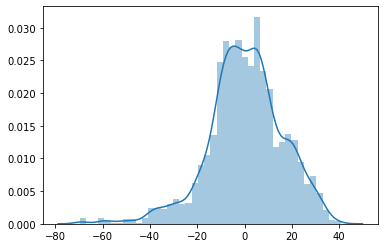

In [52]:
sns.distplot(y_test-pred)

In [53]:
from sklearn import metrics 
import numpy as np

In [54]:
print("MAE",metrics.mean_absolute_error(y_test,pred))
print("MSE",metrics.mean_squared_error(y_test,pred))
print("RMSE",np.sqrt(metrics.mean_squared_error(y_test,pred)))

MAE 12.11671658156532
MSE 251.03625534856727
RMSE 15.844123685094335


In [55]:
from sklearn.linear_model import Lasso

In [56]:
lasso = Lasso()
params = {'alpha' : [1e-15,1e-10,1e-08,1e-03,1e-02,1,5,10,20,30,35,40]}
lasso_reg = GridSearchCV(lasso,params,scoring='neg_mean_squared_error',cv=5)
lasso_reg.fit(X_train,y_train)

C:\Users\vijayk1\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4490832.330673381, tolerance: 2528.7619405923347
  model = cd_fast.enet_coordinate_descent(
C:\Users\vijayk1\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4410667.809945122, tolerance: 2545.6442729529645
  model = cd_fast.enet_coordinate_descent(
C:\Users\vijayk1\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4665750.901042743, tolerance: 2666.7465672473886
  model = cd_fast.enet_coordinate_descent(
C:\Users\vijayk1\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: Conver

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             scoring='neg_mean_squared_error')

In [57]:
lasso_reg.best_params_

{'alpha': 1}

In [58]:
pred = lasso_reg.predict(X_test)

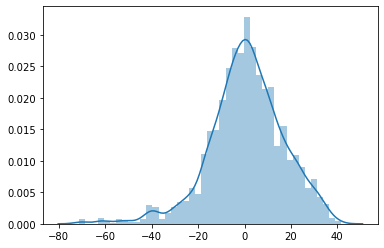

In [59]:
sns.distplot(y_test-pred)

In [60]:
# Creating a pickle file for the Lasso Regressor

In [61]:
filename = 'ipl_score_pred.pkl'
pickle.dump(lasso_reg, open(filename, 'wb'))